In [19]:
import sys
sys.path.append("D:\python\lib\site-packages")

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as io
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
data_app = pd.read_csv('./google-play-store-apps/googleplaystore.csv', sep=',')

In [20]:
pd.read_csv('./google-play-store-apps/googleplaystore.csv', sep=',',encoding="ISO-8859-1")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [35]:
data_app = pd.read_csv('./google-play-store-apps/googleplaystore.csv', sep=',')
print(data_app.shape)

head = data_app.columns
print(head)

(10841, 13)
Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [56]:
print(data_app.shape)

head = data_app.columns
print("----")
for i in range(len(head)):
    print(i, head[i])
print("----")

data_app_c = np.array(data_app)

i=0
for i in range(len(data_app_c[:])):
    if data_app_c[i][5] == "Free":
        print("THIS: ", data_app_c[i])
        data_app_c1 = np.delete(data_app_c, i, 0)

data_app_c = data_app_c1


i=0
for i in range(len(data_app_c[:])):
    for char in data_app_c[i][5]:
        if char in " ?.!/;:+,":
            data_app_c[i][5] = data_app_c[i][5].replace(char,'')
    if float(data_app_c[i][5]) <= 100:
        data_app_c[i][5] = 100
    if float(data_app_c[i][5]) > 100 and int(data_app_c[i][5])<= 5000:
        data_app_c[i][5] = 5000
    if float(data_app_c[i][5]) > 5000 and int(data_app_c[i][5])<= 50000:
        data_app_c[i][5] = 500000
    if float(data_app_c[i][5]) > 50000 and int(data_app_c[i][5])<= 500000:
        data_app_c[i][5] = 500000
    if float(data_app_c[i][5]) > 500000 and int(data_app_c[i][5])<= 5000000:
        data_app_c[i][5] = 5000000
    if float(data_app_c[i][5]) > 5000000:
        data_app_c[i][5] = 10000000
        
for i in range(len(data_app_c[:])):
    if data_app_c[i][4].endswith("M"):
        data_app_c[i][4] = data_app_c[i][4][:-1]
    if data_app_c[i][4] == "Varies with device":
        data_app_c[i][4] = float("NaN")
    elif data_app_c[i][4].endswith("k"):
        data_app_c[i][4] = float(data_app_c[i][4][:-1])/1000
    if data_app_c[i][2] == "#¡NUM!":
        data_app_c[i][2] = float("NaN")
    if data_app_c[i][6] == 'Free':     #free is encoded as 0
        data_app_c[i][6] = 0
    if data_app_c[i][6] == 'Paid':     #paid is encoded as 1
        data_app_c[i][6] = 1 
 
print(data_app_c[2])


(10841, 13)
----
0 App
1 Category
2 Rating
3 Reviews
4 Size
5 Installs
6 Type
7 Price
8 Content Rating
9 Genres
10 Last Updated
11 Current Ver
12 Android Ver
----
THIS:  ['Life Made WI-Fi Touchscreen Photo Frame' '1.9' 19.0 '3.0M' '1,000+'
 'Free' '0' 'Everyone' nan 'February 11, 2018' '1.0.19' '4.0 and up' nan]
['U Launcher Lite – FREE Live Cool Themes, Hide Apps' 'ART_AND_DESIGN' 4.7
 '87510' '8.7' 5000000 0 '0' 'Everyone' 'Art & Design' 'August 1, 2018'
 '1.2.4' '4.0.3 and up']


In [57]:
data_app_cN = pd.DataFrame(data_app_c)
data_app_cN = data_app_cN .dropna()

data_app_cN = data_app_cN.values
print(data_app_c.shape)
print(data_app_cN.shape)

print(data_app_c[2])
print(data_app_cN[2])

(10840, 13)
(7723, 13)
['U Launcher Lite – FREE Live Cool Themes, Hide Apps' 'ART_AND_DESIGN' 4.7
 '87510' '8.7' 5000000 0 '0' 'Everyone' 'Art & Design' 'August 1, 2018'
 '1.2.4' '4.0.3 and up']
['U Launcher Lite – FREE Live Cool Themes, Hide Apps' 'ART_AND_DESIGN' 4.7
 '87510' '8.7' 5000000 0 '0' 'Everyone' 'Art & Design' 'August 1, 2018'
 '1.2.4' '4.0.3 and up']


In [58]:
#transforming numerical values to float 
for i in range(len(data_app_c[:])):
    data_app_c[i][2] = float(data_app_c[i][2]) #Rating
    data_app_c[i][3] = float(data_app_c[i][3]) #Reviews
    data_app_c[i][4] = float(data_app_c[i][4]) #Size
    data_app_c[i][5] = int(data_app_c[i][5]) #Installs

        
#delete the name category for everything
del_categories = [0, 7, 9, 10, 11, 12]
data_app_c = np.delete(data_app_c, del_categories, 1)
data_app_cN = np.delete(data_app_cN, del_categories, 1)
head = np.delete(head, del_categories)

print(data_app_c.shape)
print(data_app_cN.shape)
print("----")


print("----")
for i in range(len(head)):
    print(i, head[i])
print("----")

# columns = [1'Category', 2'Rating', 3'Reviews', 4'Size', 5 Installs', 6'Type', 7'Content Rating'])


(10840, 7)
(7723, 7)
----
----
0 Category
1 Rating
2 Reviews
3 Size
4 Installs
5 Type
6 Content Rating
----


In [ ]:
# # print(data_app_c.isna().sum())

# # print(data_app_c.isna().sum())
# data_app_c.isnull().sum().sum()
# data_app_c = data_app_c.dropna()
# print(data_app_c.isnull().sum().sum())
# data_app_c = data_app_c.reset_index()
# data_app_c = data_app_c.values

In [59]:
le = preprocessing.LabelEncoder()

a = le.fit_transform(data_app_c.T[0].astype(str)) #Category
data_app_c.T[0] = a
a = le.fit_transform(data_app_c.T[5].astype(str)) #Type
data_app_c.T[5] = a
a = le.fit_transform(data_app_c.T[6].astype(str)) #Content Rating
data_app_c.T[6] = a

a = le.fit_transform(data_app_cN.T[0].astype(str)) #Category
data_app_cN.T[0] = a
a = le.fit_transform(data_app_cN.T[5].astype(str)) #Type
data_app_cN.T[5] = a
a = le.fit_transform(data_app_cN.T[6].astype(str)) #Content Rating
data_app_cN.T[6] = a


enc = preprocessing.OneHotEncoder()
enc.fit(data_app_cN)
onehotlabels = enc.transform(data_app_cN).toarray()
onehotlabels.shape

print(data_app_cN.shape)
print(data_app_cN)
print(onehotlabels.shape)
print(onehotlabels)


# print(data_app_c[0])
# print(head)

(7723, 7)
[[0 4.1 '159' ... 500000 0 1]
 [0 3.9 '967' ... 500000 0 1]
 [0 4.7 '87510' ... 5000000 0 1]
 ...
 [11 4.5 '38' ... 5000 0 1]
 [11 5.0 '4' ... 100 0 1]
 [18 4.5 '398307' ... 10000000 0 1]]
(7723, 4821)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [68]:
pd.DataFrame(onehotlabels)

,0,1,2,3,4,5,6,7,8,9,...,4811,4812,4813,4814,4815,4816,4817,4818,4819,4820
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


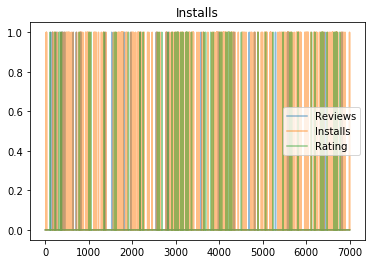

In [69]:
#print(pd.DataFrame.describe(pd.DataFrame(data_app_c[:, 4])))
#print("--------")
n_samp = 7000

data_app_c = onehotlabels

random_idx = np.random.randint(0, len(data_app_c[:, 1]), n_samp)
rating_t = data_app_c[:, 1][random_idx].astype(float)

random_idx = np.random.randint(0, len(data_app_c[:, 2]), n_samp)
review_t = data_app_c[:, 2][random_idx].astype(float)

random_idx = np.random.randint(0, len(data_app_c[:, 4]), n_samp)
installs_t = data_app_c[:, 4][random_idx].astype(int)





plt.plot(review_t, alpha = 0.5, label = head[2])
plt.title(head[2])

plt.plot(installs_t, alpha = 0.5, label = head[4])
plt.title(head[4])

plt.plot(rating_t, alpha = 0.5, label = head[1])
plt.title(head[4])

plt.legend()

#not sure what this should plot but it gives an error
plt.figure(figsize=(10,10))

i=0
for i in enumerate(head):        
    plt.subplot(5,5, i+1)
    plt.hist(data_app_c[:,i])
    plt.title(head[i])
    plt.legend()
    plt.tight_layout()

In [70]:
dataframe_app_c = pd.DataFrame(onehotlabels)
dataframe_app_c.shape

(7723, 4821)

In [ ]:
# K-Means Clustering

X = dataframe_app_c


#REMOVED AOVE: App  object

#Category           object
#Rating            float64
#Reviews            object
#Size               object
#Installs           object
#Type               object
#Price              object
#Content Rating     object
#Genres             object
#Last Updated       object
#Current Ver        object
#Android Ver        object

X = pd.DataFrame(X)
X = X.convert_objects(convert_numeric=True)
#X.columns = onehotlabels.T[:] #['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type','Content Rating']

# Eliminating null values
#for i in X.columns:
    #X[i] = X[i].fillna(int(X[i].mean()))
#for i in X.columns:
    #print(X[i].isnull().sum())
    

# Using the elbow method to find  the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying k-means to the googleplaydata dataset
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

X = X.as_matrix(columns=None)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='C3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of apps')
plt.legend()
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
